Library imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_auc_score

import utilities as utils

Loads the datacube

In [2]:
data_aus = utils.load_dataset('data/datacube_sri_aus.csv')
data_uscanada = utils.load_dataset('data/datacube_sri_uscan.csv')

In [3]:
data_aus.head()

,s2_cell_id,s2_cell_center,s2_cell_poly,GeophysicsLAB_Australia_resampled,GeophysicsMoho_Australia_resampled,GeophysicsSatelliteGravity_ShapeIndex_Australia_resampled,GeophysicsGravity_Australia,GeophysicsGravity_HGM_Australia,GeophysicsGravity_UpCont30km_HGM_Australia,GeophysicsMagRTP_HGM_Australia_resampled,GeophysicsMagRTP_HGMDeepSources_Australia_resampled,ShallowGravitySources_Worms_Australia,DeepGravitySources_Worms_Australia,ShallowMagSources_Worms_Australia,DeepMagSources_Worms_Australia,MVT_Deposit,MVT_Occurrence,MVT_DepositOccurrence,MVT_DepositOccurrenceNeighbors
0,3.039185e+18,"(115.53257966583386, -32.01562996655234)",POLYGON ((115.52073578584024 -32.0287875150602...,118.061768,NaN,NaN,-825.605896,0.013045,0.001352,0.000001,57.170799,0.239406,1.229636,0.019520,0.955978,False,False,False,False
1,3.039185e+18,"(115.50889142213369, -31.999479960821)",POLYGON ((115.49704657613238 -32.0126371983332...,118.061768,NaN,NaN,-833.284119,0.006415,0.001183,0.000002,53.437523,0.265906,1.250722,0.013502,0.980021,False,False,False,False
2,3.039185e+18,"(115.50889142213369, -32.02071387573413)",POLYGON ((115.49704657613238 -32.0338700644866...,118.061768,NaN,NaN,-824.456604,0.010581,0.001267,0.000002,53.494488,0.260252,1.247361,0.009737,0.966298,False,False,False,False
3,3.039191e+18,"(115.65099154987016, -32.15978364725093)",POLYGON ((115.63915258490901 -32.1729395091806...,NaN,NaN,NaN,-701.191284,0.012779,0.002941,0.000002,74.419914,0.140932,1.081456,0.075177,0.767171,False,False,False,False
4,3.039193e+18,"(115.65099154987016, -32.18097103069401)",POLYGON ((115.63915258490901 -32.1941258138235...,NaN,NaN,NaN,NaN,NaN,NaN,0.000002,74.231186,0.135606,1.062271,0.056841,0.750506,False,False,False,False


In [4]:
data_uscanada.head()

,s2_cell_id,s2_cell_center,s2_cell_poly,GeophysicsLAB_USCanada_resampled,USCanada_Moho_resampled,GeophysicsSatelliteGravity_ShapeIndex_USCanada_resampled,GeophysicsGravity_USCanada_resampled,GeophysicsGravity_HGM_USCanada_resampled,GeophysicsGravity_Up30km_HGM_USCanada_resampled,GeophysicsMag_RTP_HGM_USCanada_resampled,USCanadaMagRTP_HGMDeepSources_resampled,ShallowGravitySources_Worms_USCanada,DeepGravitySources_Worms_USCanada,ShallowMagSources_Worms_USCanada,DeepMagSources_Worms_USCanada,MVT_Deposit,MVT_Occurrence,MVT_DepositOccurrence,MVT_DepositOccurrenceNeighbors
0,5.407508e+18,"(-52.77455720096285, 47.79014133427333)",POLYGON ((-52.75017029782352 47.79235272322585...,167.458481,36.951820,NaN,-14.635756,0.000478,6.129842,NaN,0.000008,0.020289,0.470099,3.231292,0.852695,False,False,False,False
1,5.407508e+18,"(-52.79668480860249, 47.775641586895475)",POLYGON ((-52.772308984340135 47.7778586350250...,167.485397,36.920330,NaN,-14.081331,0.000519,6.144084,NaN,0.000008,0.010582,0.447087,3.213096,0.861847,False,False,False,False
2,5.407510e+18,"(-52.81427963585849, 47.7365941993138)",POLYGON ((-52.789928484457185 47.7388146935553...,167.494980,36.847523,NaN,-12.938763,0.000470,6.185924,NaN,0.000008,0.032890,0.404188,3.197815,0.896195,False,False,False,False
3,5.407511e+18,"(-52.787679290472134, 47.72654503197568)",POLYGON ((-52.763330665519334 47.7287576848285...,167.476105,36.836487,NaN,-13.922650,0.000613,6.158608,NaN,0.000008,0.013429,0.411903,3.222383,0.910071,False,False,False,False
4,5.407511e+18,"(-52.765573065990225, 47.74102844443887)","POLYGON ((-52.74121339274432 47.7432354490161,...",167.444885,36.853416,NaN,-14.739796,0.000506,6.128949,NaN,0.000008,0.013779,0.436983,3.243503,0.902040,False,False,False,False


In [5]:
data_aus.rename({
    'GeophysicsLAB_Australia_resampled' : 'GeophysicsLAB',
    'GeophysicsMoho_Australia_resampled' : 'GeophysicsMoho',
    'GeophysicsSatelliteGravity_ShapeIndex_Australia_resampled' : 'GeophysicsSatelliteGravity_ShapeIndex',
    'GeophysicsGravity_Australia' : 'GeophysicsGravity', 
    'GeophysicsGravity_HGM_Australia' : 'GeophysicsGravity_HGM',
    'GeophysicsGravity_UpCont30km_Australia' : 'GeophysicsGravity_UpCont30km',
    'GeophysicsGravity_UpCont30km_HGM_Australia' : 'GeophysicsGravity_UpCont30km_HGM',
    'GeophysicsMagRTP_Australia' : 'GeophysicsMagRTP', 
    'GeophysicsMagRTP_DeepSources_Australia' : 'GeophysicsMagRTP_DeepSources',
    'GeophysicsMagRTP_VD_Australia' : 'GeophysicsMagRTP_VD',
    'GeophysicsMagRTP_HGM_Australia_resampled' : 'GeophysicsMagRTP_HGM',
    'GeophysicsMagRTP_HGMDeepSources_Australia_resampled' : 'GeophysicsMagRTP_HGMDeepSources',
    'ShallowGravitySources_Worms_Australia' : 'ShallowGravitySources_Worms',
    'DeepGravitySources_Worms_Australia' : 'DeepGravitySources_Worms',
    'ShallowMagSources_Worms_Australia' : 'ShallowMagSources_Worms', 
    'DeepMagSources_Worms_Australia' : 'DeepMagSources_Worms'
}, axis=1, inplace=True)
data_aus["Continent_Majority"] = "Oceania"

data_uscanada.rename({
    'GeophysicsLAB_USCanada_resampled' : 'GeophysicsLAB', 
    'USCanada_Moho_resampled' : 'GeophysicsMoho',
    'GeophysicsSatelliteGravity_ShapeIndex_USCanada_resampled' : 'GeophysicsSatelliteGravity_ShapeIndex',
    'GeophysicsGravity_USCanada_resampled' : 'GeophysicsGravity',
    'GeophysicsGravity_HGM_USCanada_resampled' : 'GeophysicsGravity_HGM',
    'GeophysicsGravity_Up30km_USCanada_resampled' : 'GeophysicsGravity_UpCont30km',
    'GeophysicsGravity_Up30km_HGM_USCanada_resampled' : 'GeophysicsGravity_UpCont30km_HGM',
    'GeophysicsMag_RTP_USCanada_resampled' : 'GeophysicsMagRTP', 
    'USCanadaMagRTP_DeepSources_resampled' : 'GeophysicsMagRTP_DeepSources',
    'GeophysicsMag_RTP_VD_USCanada_resampled' : 'GeophysicsMagRTP_VD',
    'GeophysicsMag_RTP_HGM_USCanada_resampled' : 'GeophysicsMagRTP_HGM',
    'USCanadaMagRTP_HGMDeepSources_resampled' : 'GeophysicsMagRTP_HGMDeepSources',
    'ShallowGravitySources_Worms_USCanada' : 'ShallowGravitySources_Worms',
    'DeepGravitySources_Worms_USCanada' : 'DeepGravitySources_Worms', 
    'ShallowMagSources_Worms_USCanada' : 'ShallowMagSources_Worms',
    'DeepMagSources_Worms_USCanada' : 'DeepMagSources_Worms'
}, axis=1, inplace=True)
data_uscanada["Continent_Majority"] = "North America"

Selects the data /labels used for MVT WOE baseline

In [6]:
data = pd.concat((data_aus, data_uscanada), ignore_index = True)
data.reset_index(drop=True, inplace=True)
data['Lat'] = data['s2_cell_center'].apply(lambda x: float(x.rsplit(',',1)[1][:-1]))
data['Lng'] = data['s2_cell_center'].apply(lambda x: float(x.rsplit(',',1)[0][1:]))
data.dtypes

s2_cell_id                               float64
s2_cell_center                            object
s2_cell_poly                              object
GeophysicsLAB                            float64
GeophysicsMoho                           float64
GeophysicsSatelliteGravity_ShapeIndex    float64
GeophysicsGravity                        float64
GeophysicsGravity_HGM                    float64
GeophysicsGravity_UpCont30km_HGM         float64
GeophysicsMagRTP_HGM                     float64
GeophysicsMagRTP_HGMDeepSources          float64
ShallowGravitySources_Worms              float64
DeepGravitySources_Worms                 float64
ShallowMagSources_Worms                  float64
DeepMagSources_Worms                     float64
MVT_Deposit                                 bool
MVT_Occurrence                              bool
MVT_DepositOccurrence                       bool
MVT_DepositOccurrenceNeighbors              bool
Continent_Majority                        object
Lat                 

In [8]:
cols_dict = {
            's2_cell_id' : None,                                        # Polygon with coordinates of the vertices
            'GeophysicsLAB' : None,                                     # Depth to LAB
            'GeophysicsMoho' : None,                                    # Depth to Moho
            'GeophysicsSatelliteGravity_ShapeIndex' : None,             # Sattelite Gravity
            'GeophysicsGravity' : None,                                 # Gravity Bouguer
            'GeophysicsGravity_HGM' : None,                             # Gravity HGM
            'GeophysicsGravity_UpCont30km_HGM' : None,                  # Gravity upward cont'd HGM
            'ShallowGravitySources_Worms' : None,                       # Gravity worms
            'DeepGravitySources_Worms' : None,                          # Gravity upward cont'd worms
            'GeophysicsMagRTP_HGM' : None,                              # Magnetic HGM
            'GeophysicsMagRTP_HGMDeepSources' : None,                   # Magnetic long-wavelength HGM
            'ShallowMagSources_Worms' : None,                           # Magnetic worms
            'DeepMagSources_Worms' : None,                              # Magnetic long-wavelength worms
            'MVT_Deposit' : None,
            'MVT_Occurrence' : None,
            'MVT_DepositOccurrence' : None,
            'MVT_DepositOccurrenceNeighbors' : None,
        }

data_filtered, cols = utils.extract_cols(data, cols_dict)

data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5660532 entries, 0 to 5660531
Data columns (total 17 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   s2_cell_id                             float64
 1   GeophysicsLAB                          float64
 2   GeophysicsMoho                         float64
 3   GeophysicsSatelliteGravity_ShapeIndex  float64
 4   GeophysicsGravity                      float64
 5   GeophysicsGravity_HGM                  float64
 6   GeophysicsGravity_UpCont30km_HGM       float64
 7   ShallowGravitySources_Worms            float64
 8   DeepGravitySources_Worms               float64
 9   GeophysicsMagRTP_HGM                   float64
 10  GeophysicsMagRTP_HGMDeepSources        float64
 11  ShallowMagSources_Worms                float64
 12  DeepMagSources_Worms                   float64
 13  MVT_Deposit                            bool   
 14  MVT_Occurrence                         bool   
 15

In [9]:
print(data_filtered['MVT_Deposit'].value_counts(), '\n')
print(data_filtered['MVT_Occurrence'].value_counts(), '\n')
print(data_filtered['MVT_DepositOccurrence'].value_counts(), '\n')
print(data_filtered['MVT_DepositOccurrenceNeighbors'].value_counts(), '\n')

MVT_Deposit
False    5660362
True         170
Name: count, dtype: int64 

MVT_Occurrence
False    5657708
True        2824
Name: count, dtype: int64 

MVT_DepositOccurrence
False    5657602
True        2930
Name: count, dtype: int64 

MVT_DepositOccurrenceNeighbors
False    5646428
True       14104
Name: count, dtype: int64 



In [10]:
labels_filtered = data_filtered['MVT_DepositOccurrenceNeighbors']
data_filtered = data_filtered.drop(columns=['s2_cell_id', 'MVT_Deposit', 'MVT_Occurrence', 'MVT_DepositOccurrence', 'MVT_DepositOccurrenceNeighbors'])
cols = cols[1:-4]

Clearly the dataset has MANY outliers, as reported in the paper

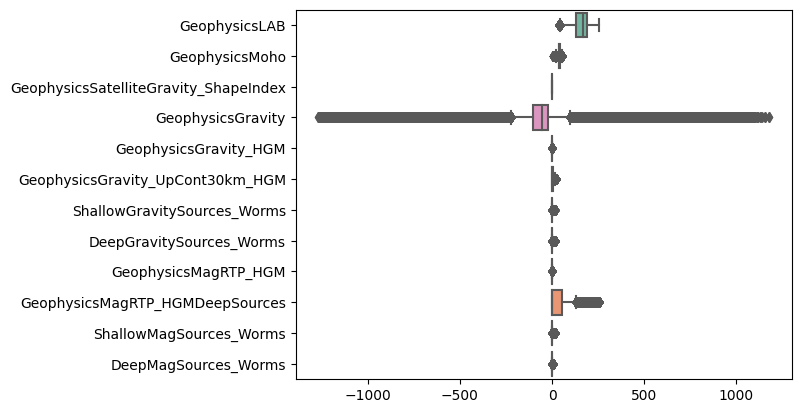

In [11]:
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

We can remove these outliers

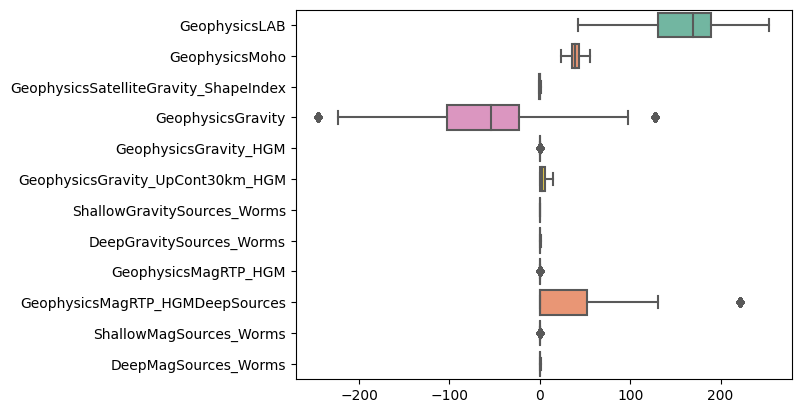

In [12]:
data_filtered = utils.tukey_remove_outliers(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")

There are also many NaNs in the data, these can be "imputed" with the mean value.

In [13]:
print(data_filtered.isna().sum())

GeophysicsLAB                            113193
GeophysicsMoho                            12270
GeophysicsSatelliteGravity_ShapeIndex    104272
GeophysicsGravity                         60758
GeophysicsGravity_HGM                     60758
GeophysicsGravity_UpCont30km_HGM          60758
ShallowGravitySources_Worms              249789
DeepGravitySources_Worms                 249789
GeophysicsMagRTP_HGM                     368085
GeophysicsMagRTP_HGMDeepSources          249789
ShallowMagSources_Worms                  249789
DeepMagSources_Worms                     249789
dtype: int64


In [14]:
data_filtered = utils.impute_nans(data_filtered)
print(data_filtered.isna().sum())

GeophysicsLAB                            0
GeophysicsMoho                           0
GeophysicsSatelliteGravity_ShapeIndex    0
GeophysicsGravity                        0
GeophysicsGravity_HGM                    0
GeophysicsGravity_UpCont30km_HGM         0
ShallowGravitySources_Worms              0
DeepGravitySources_Worms                 0
GeophysicsMagRTP_HGM                     0
GeophysicsMagRTP_HGMDeepSources          0
ShallowMagSources_Worms                  0
DeepMagSources_Worms                     0
dtype: int64


Finally, it can be observed the above data is not "normalized", we should make features standard scores / z-scores

(note remaining outliers above were within the Tukey fences calculated over ALL the data)


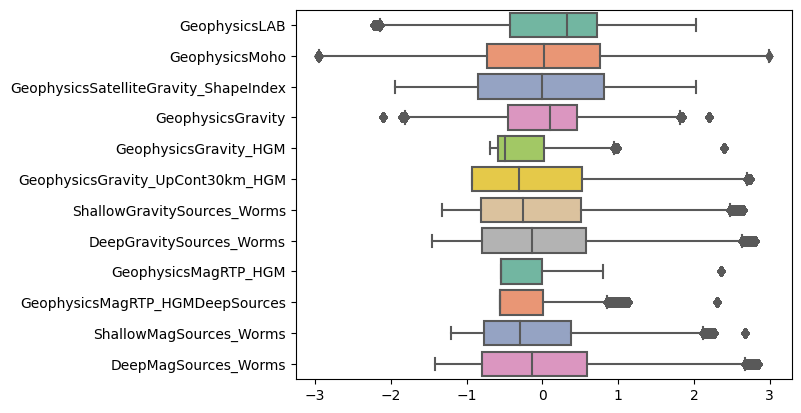

In [15]:
data_filtered = utils.normalize_df(data_filtered)
ax = sns.boxplot(data=data_filtered, orient="h", palette="Set2")
print("(note remaining outliers above were within the Tukey fences calculated over ALL the data)")

Discretizes the continuous variables in 5 bins

In [16]:
nbins = 5
for col in cols:
    data_filtered[col] = pd.qcut(data_filtered[col], nbins)
data_filtered["target"] = labels_filtered

Forms the train / test splits

In [17]:
data_filtered["Latitude_EPSG4326"] = data["Lat"]
data_filtered["Training_MVT_Deposit"] = data["MVT_Deposit"]
te_df, tr_df, _ = utils.get_spatial_cross_val_idx(data_filtered, test_set=1, split_col="Training_MVT_Deposit", nbins=36)
tr_df = tr_df.drop(columns=["Training_MVT_Deposit"])
te_df = te_df.drop(columns=["Training_MVT_Deposit"])

# test_set = 1 closest split counts in paper
print(f"Train counts: {tr_df['target'].value_counts()}")
print(f"Test counts: {te_df['target'].value_counts()}")

Train counts: target
False    3835894
True       12525
Name: count, dtype: int64
Test counts: target
False    1810534
True        1579
Name: count, dtype: int64


Computes WOE / IV for each variable based on the training dataset

In [18]:
lst = []
IV_df = pd.DataFrame(columns=['Variable','IV'])
for col in cols:
    df, iv = utils.calculate_woe_iv(tr_df, col, 'target')
    lst.append(df)
    IV_df = pd.concat([IV_df, pd.DataFrame([{"Variable": col ,"IV": iv,}])], ignore_index=True)

In [19]:
# shows the overall IV for all variables on MVT deposits/occurences
print(f"Information Value Overview:\n{IV_df.sort_values('IV', ascending=False)}\n\n\n")

Information Value Overview:
                                 Variable        IV
0                           GeophysicsLAB  0.877690
5        GeophysicsGravity_UpCont30km_HGM  0.562956
1                          GeophysicsMoho  0.462114
9         GeophysicsMagRTP_HGMDeepSources  0.295060
3                       GeophysicsGravity  0.289801
2   GeophysicsSatelliteGravity_ShapeIndex  0.167530
11                   DeepMagSources_Worms  0.140658
8                    GeophysicsMagRTP_HGM  0.107878
4                   GeophysicsGravity_HGM  0.096557
7                DeepGravitySources_Worms  0.029822
6             ShallowGravitySources_Worms  0.020486
10                ShallowMagSources_Worms  0.013230





Merge the WOE data into the existig input datacube

In [20]:
# gets the WOE for all variables on MVT deposits/occurences
tr_result = tr_df
te_result = te_df
all_result = pd.concat([tr_result, te_result])
for i, col in enumerate(cols):
    col_data = lst[i]
    col_data = col_data.rename(columns={"Value":col, "WoE":f"{col}_WoE", "IV":f"{col}_IV"})
    tr_result = pd.merge(tr_result, col_data[[col, f"{col}_WoE", f"{col}_IV"]], on=col)
    te_result = pd.merge(te_result, col_data[[col, f"{col}_WoE", f"{col}_IV"]], on=col)
    all_result = pd.merge(all_result, col_data[[col, f"{col}_WoE", f"{col}_IV"]], on=col)

Combines the WOE for each comlumn

In [21]:
tr_result["WOE Total"] = tr_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)
te_result["WOE Total"] = te_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)
all_result["WOE Total"] = all_result.loc[:,[f"{col}_WoE" for col in cols]].sum(axis=1)

In [22]:
auc_score = roc_auc_score(tr_result["target"],tr_result["WOE Total"])
print(f"Train AUC score:{auc_score}")
auc_score = roc_auc_score(te_result["target"],te_result["WOE Total"])
print(f"Test AUC score:{auc_score}")
auc_score = roc_auc_score(all_result["target"],all_result["WOE Total"])
print(f"All AUC score:{auc_score}")

Train AUC score:0.7969904838376607
Test AUC score:0.8054585147802324
All AUC score:0.811493801937275
